<a href="https://colab.research.google.com/github/tatsambon-tdc/soustitreur/blob/master/TPE_GROUPE_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Salut à vous, ce notebook vient de TATSAMBON :) 
Pour faciliter la compréhension de la méthode d'apprentissage Supervisé qui nous concerne : K NN 
**Il est important de noter qu'un nouvel notebook sera créé pour l'implémentation dudit concept   dans le cadre de notre projet **






En fait, le k-NN est un type spécial d’algorithme de l'appentissage supervisé. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement. Ce type d’algorithme est appelé memory-based.



[resources de kaggle](https://docs.google.com/document/d/16SNyXSDShEEzjN474f6V1XTezAZ8b4-aOmMV7LNgI_I/edit#)


In [ ]:
cd /content/sample_data/PROJET INF 365


/content/sample_data/PROJET INF 365


In [ ]:
ls 

DataT3RR.csv


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing

ON UTILISE ICI UNE DATASET FORURNIE PAR 
[le site web KAGGLE ]

In [ ]:
data = pd.read_csv('./DataT3RR.csv')
print('Size of weather data frame is :',data.shape)
data.info()
data[0:10]

Size of weather data frame is : (923, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stasiun      923 non-null    object 
 1   Tanggal      923 non-null    object 
 2   Tn           923 non-null    float64
 3   Tx           923 non-null    float64
 4   Tavg         923 non-null    float64
 5   RR           923 non-null    float64
 6   Hari_hujan   923 non-null    int64  
 7   Besok_hujan  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


,Stasiun,Tanggal,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
5,Stasiun Meteorologi Maritim Tanjung Mas,14-01-2009,24.0,27.0,24.9,92.8,1,1
6,Stasiun Meteorologi Maritim Tanjung Mas,12-01-2010,25.0,30.6,27.4,89.0,1,1
7,Stasiun Meteorologi Maritim Tanjung Mas,25-03-2010,25.0,32.0,28.3,82.2,1,1
8,Stasiun Meteorologi Maritim Tanjung Mas,13-03-2010,26.4,33.4,29.3,82.0,1,1
9,Stasiun Klimatologi Bogor,10-02-2010,21.8,33.2,25.8,81.2,1,1


on effectue le 

In [11]:
data = data.drop(columns=['Stasiun','Tanggal'],

                 axis=1)
data = data.dropna(how='any')
print(data.shape)

(923, 6)


In [12]:
print(data.shape)
data.head()

(923, 6)


,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


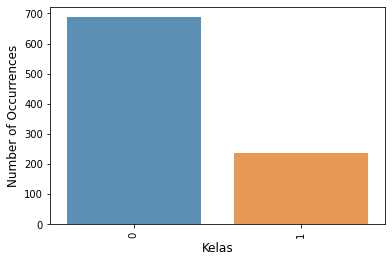

In [13]:
cnt_pro = data['Besok_hujan'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


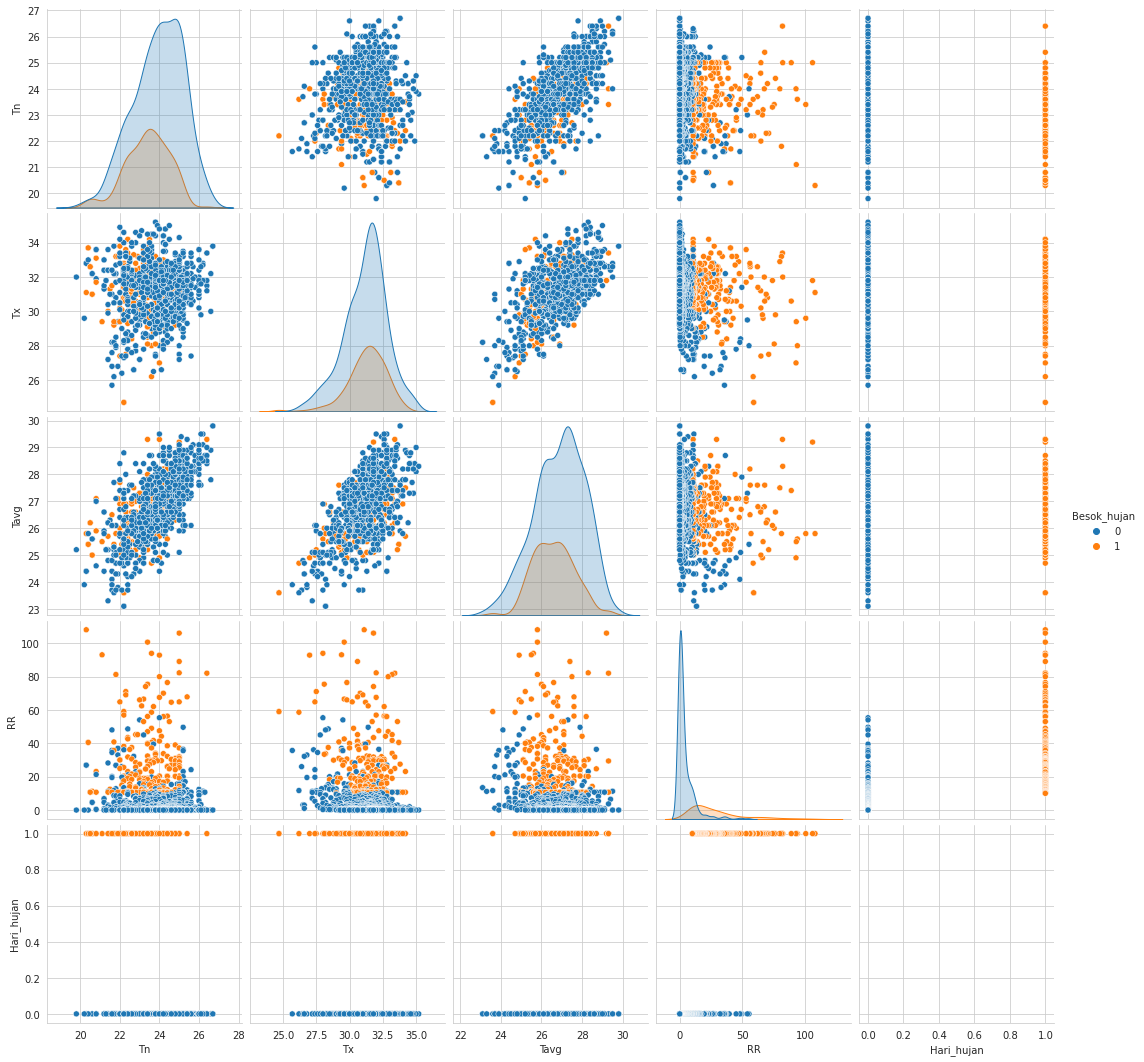

In [14]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Besok_hujan",size=3);
plt.show()

In [15]:
# Calculate the correlation matrix
corr = data.corr()
corr1 = pd.DataFrame(abs(corr['Besok_hujan']),columns = ['Besok_hujan','Tn','Tx','Tavg'])
nonvals = corr1.loc[corr1['Besok_hujan'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# We extract variables with correlation less than 0.5%
data1 = data.drop(columns=nonvals,axis=1)
print('Data Final',data1.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [Besok_hujan, Tn, Tx, Tavg]
Index: []
Data Final (923, 6)


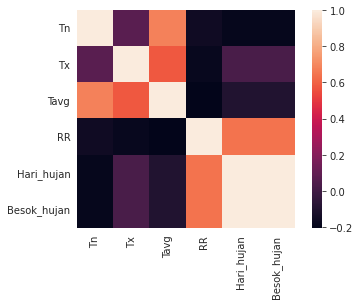

In [16]:
data = data[['Tn','Tx','Tavg','RR','Hari_hujan','Besok_hujan']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [17]:
from sklearn.model_selection import train_test_split
Y = data1['Besok_hujan']
X = data1.drop(columns=['Besok_hujan'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [18]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (646, 5)
Y train shape:  (646,)
X test shape:  (277, 5)
Y test shape:  (277,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

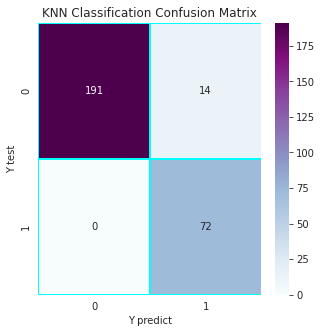

In [21]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [22]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [23]:


#Accuracy
model1 = pd.DataFrame({
    'Model': ['KNN'],
    'Train Score': [train_acc_knncla],
    'Test Score': [test_acc_knncla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,KNN,97.68,94.95


In [24]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.84


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.84')

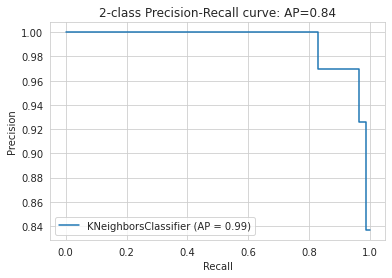

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(knncla,X_train, Y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [26]:
Y1 = data['Besok_hujan']
X1 = data.drop(columns=['Besok_hujan','Hari_hujan'])

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Tn', 'Tx', 'RR']
3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


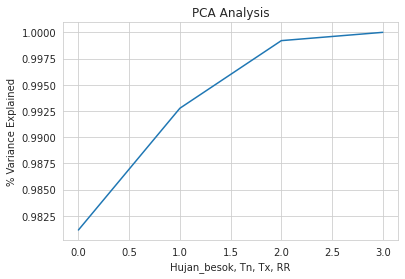

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Hujan_besok, Tn, Tx, RR')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [28]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1, 5))) 
print(variance[30:70])


Series([], dtype: float64)


In [29]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=9)

In [30]:
# K-Nearest Neighbor classification
knncla.fit(X1_train, Y1_train)
Y1_predict6 = knncla.predict(X1_test)
knncla_cm = confusion_matrix(Y1_test, Y1_predict6)
score1_knncla= knncla.score(X1_test, Y1_test)

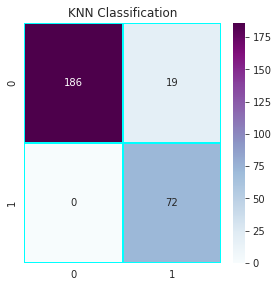

In [31]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('KNN Classification')
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="BuPu" ,fmt='g', ax=ax1)
plt.show()

In [35]:
Testscores1 = pd.Series([score1_knncla], index=[ 'K-Nearest Neighbour Score']) 
print(Testscores1)

K-Nearest Neighbour Score    0.931408
dtype: float64


In [36]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y1_test, Y1_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.79
